# Random CONNECTED graph generator

In [2]:
TRIALS = 10

In [3]:
import random
import numpy as np
k = [(0.2, 0), (0.3, 1), (0.4, 2), (0.6, 3), (0.8, 4), (0.95, 5)]
n = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

#n_ver, n_edg = total no of vertices and edges respectively
def generate(n_ver, saturation, trial): 
    n_edg = int (saturation[0] * 0.5 * n_ver * (n_ver - 1))
    if (n_edg < n_ver-1):
        n_edg = n_ver-1
        
    edges = np.zeros((n_ver, n_ver))
    for x in range(n_ver):
        edges[x][x]=1
    
    f = open("data/graph"+str(n_ver)+"sat"+str(saturation[1])+"_"+str(trial)+".txt", 'w') #pewnie da się ładniej ale kit

    for i in range (1,n_edg+1):
        if (i < n_ver ):
            a = i
            b = random.randint(0,i-1)
        else:
            a = random.randint(0,n_ver-1)
            b = random.randint(0,n_ver-1)
            
        if (a==b or edges[a][b]==1):
            while (a==b or edges[a][b]==1):
                a = random.randint(0,n_ver-1)
                b = random.randint(0,n_ver-1)
                
        edges[a][b]=1
        edges[b][a]=1
        
        if (a < b): # (x, y) x < y 
            f.write(str(a) + " " + str(b) + "\n")
        else:
            f.write(str(b) + " " + str(a) + "\n")
    f.close()

for ver in n:
    for sat in k:
        for trial in range (TRIALS):
            generate (ver, sat, trial)
            #print ("DONE ", ver, sat)

# Chart maker

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
saturation = [0.2, 0.3, 0.4, 0.6, 0.8, 0.95]
n = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
TRIALS = 10

In [2]:
def read_data (filename):
    data = []
    f = open("data/"+filename+".txt")
    for no in n:
        temp = f.readline()
        temp = float(temp[temp.find(" ")+1:temp.find("\n")])
        #print(temp)
        data.append(temp)
    f.close()
    return data;

In [6]:
DATA = [[], [], [], [], [], []]

for i in range (2*TRIALS):
    for j in range(len(saturation)):
        DATA[j].append(read_data("saturation{}_{}".format(j, i)))


RESULTS = [[], [], [], [], [], []]

for x in range(len(saturation)):
    RESULTS[x] = np.mean(DATA[x], axis = 0)

for x in range(len(saturation)):
    print(RESULTS[x])
    

[201.78215 161.8756  201.63345 212.04865 201.4404  185.8585  233.8696
 213.1026  261.2802  241.597  ]
[ 45.0935   69.3355   93.46     86.2528   55.82285  84.3981   77.56965
 112.19515  75.92665 113.0071 ]
[16.66635 18.9169   0.2037   6.4008  37.78645 18.15575 28.36375 29.82325
 33.29185 48.71025]
[0.      0.00715 1.28555 0.0763  0.0343  0.1296  1.10465 1.17205 0.6797
 1.74075]
[0.00155 0.00475 0.00475 0.01875 0.0368  0.0682  0.10185 0.19155 0.22355
 0.33175]
[0.0008  0.0023  0.0094  0.02355 0.04455 0.0765  0.12345 0.1828  0.2581
 0.35185]


Sending final results to the file

In [7]:
f = open("FINAL.txt", 'w')

f.write("sat\t")
for pom in (saturation):
    f.write(str(pom)+"\t")

f.write("\n")
for i in range(len(n)):
    f.write(str(n[i])+"\t")
    for j in range(len(saturation)):
        f.write(str(round(RESULTS[j][i], 4))+"\t")
    f.write("\n")
f.close()

<function matplotlib.pyplot.show(close=None, block=None)>

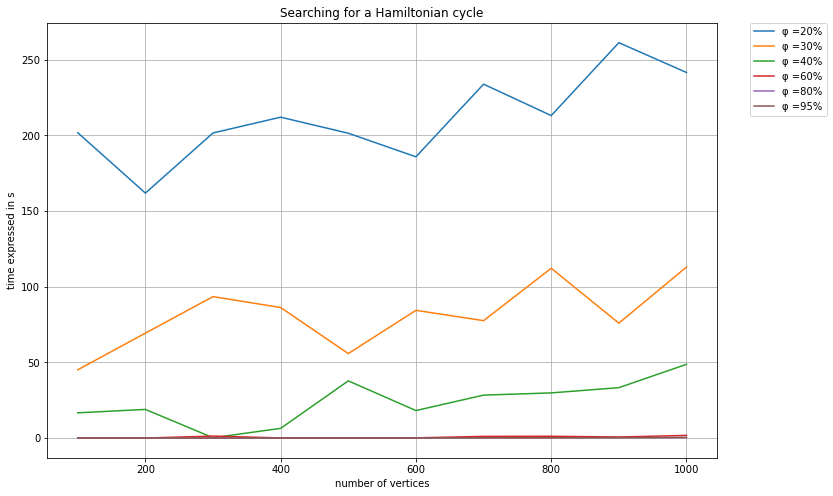

In [8]:
fig, ax = plt.subplots(figsize = (12,8))
for i in range(len(saturation)):
    ax.plot(n, RESULTS[i], label = "φ ="+str(round(saturation[i]*100))+"%")  

ax.set_xlabel("number of vertices")
ax.set_ylabel("time expressed in s")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad = 0.)
plt.grid(True)
ax.set_title("Searching for a Hamiltonian cycle")
plt.show
#plt.savefig("chart.svg")